## **Global Monkeypox Prevalence Analysis**

This project is designed to answer a set of questions regarding the Monkeypox virus, which has been declared as a global public health emergency by the World Health Organization as of July, 2022.

The provided dataset contains the number of confirmed cases reported daily by country, as well as the cumulative cases each day.

The questions will be answered by statistical analysis of the data, and question solutions will be depicted by corresponding visualizations.

***Question 1a:*** What is the total number of countries observed in this dataset?

***Question 1b:*** Which countries are included?
- Visualization 1 (Countries wordcloud (by number of entries, or using unique list/single entry per country)

***Question 2:*** What are the top 10 countries affected, by total case count?
- Visualization 2  (Top Ten bar chart)

***Question 3a:*** What is the mean number of cases for all countries observed?

***Question 3b:*** What is the median?
- Visualization 3 (Distribution plot of cumulative cases by country)

***Question 4:*** What is the sum of global cases to date?
- Visualization 4 (Global cumulative cases line chart)

***Question 5a:*** Which ten countries were the earliest cases reported in this year?

***Question 5b:*** Where and when was the earliest report of a confirmed case in the available dataset?
- Visualization 5 (visual marker on first case in line chart)

Data Source: https://github.com/globaldothealth/monkeypox/blob/main/timeseries-country-confirmed.csv

Date Downloaded: 08/13/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpld
import seaborn
from scipy import stats
import wordcloud
%matplotlib inline

In [2]:
#Opens the data csv file and creates as dataframe; previews result
mpx_data = pd.read_csv(r'C:\Users\Domanic\Desktop\MPX-8-13-2022.csv')
mpx_data

,Date,Cases,Cumulative_cases,Country
0,2022-07-25,1,1,Andorra
1,2022-07-26,2,3,Andorra
2,2022-07-27,0,3,Andorra
3,2022-07-28,0,3,Andorra
4,2022-07-29,0,3,Andorra
...,...,...,...,...
5184,2022-08-08,0,1,Venezuela
5185,2022-08-09,0,1,Venezuela
5186,2022-08-10,0,1,Venezuela
5187,2022-08-11,0,1,Venezuela


90 countries were observed in this dataset.
In alphabetized order, they are:

1. Andorra
2. Argentina
3. Australia
4. Austria
5. Barbados
6. Belgium
7. Benin
8. Bermuda
9. Bolivia
10. Bosnia And Herzegovina
11. Brazil
12. Bulgaria
13. Cameroon
14. Canada
15. Central African Republic
16. Chile
17. Colombia
18. Costa Rica
19. Croatia
20. Cyprus
21. Czech Republic
22. Democratic Republic Of The Congo
23. Denmark
24. Dominican Republic
25. Ecuador
26. Estonia
27. Finland
28. France
29. Georgia
30. Germany
31. Ghana
32. Gibraltar
33. Greece
34. Greenland
35. Guadeloupe
36. Guatemala
37. Hungary
38. Iceland
39. India
40. Ireland
41. Israel
42. Italy
43. Jamaica
44. Japan
45. Latvia
46. Lebanon
47. Liberia
48. Lithuania
49. Luxembourg
50. Malta
51. Martinique
52. Mexico
53. Moldova
54. Montenegro
55. Morocco
56. Netherlands
57. New Caledonia
58. New Zealand
59. Nigeria
60. Norway
61. Panama
62. Peru
63. Philippines
64. Poland
65. Portugal
66. Puerto Rico
67. Qatar
68. Republic of Congo
69. Ro

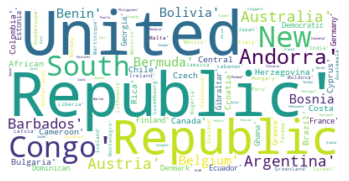

In [3]:
#Question 1a
#Outputs the number of countries observed, and an alphabetized list
countryArr = mpx_data['Country'].unique()
numCountries = len(countryArr)
print(str(numCountries)+str(' countries were observed in this dataset.'))

#Question 1b
#Outputs countries as an alphabetized list
countryList = list(countryArr)
print('In alphabetized order, they are:\n')
number = 0
for country in countryList:
    number+=1
    print(str(number)+'.', country)
    
#Visualization 1
#print('\nA Word Cloud visualization created using the country list:\n')
print('\nVisualization 1: \'Countries\' Word Cloud\n')

countryStr = str(countryList)
countryWC = wordcloud.WordCloud(background_color = 'White').generate(countryStr)
countryWC

plt.figure()
plt.imshow(countryWC, interpolation='bilinear')
plt.axis('off')
plt.show()

The top 10 countries by cumulative cases:

 Country
United States     10726
Spain              5719
Germany            3102
United Kingdom     3017
France             2659
Brazil             2458
Canada             1058
Netherlands        1025
Portugal            770
Peru                653

Visualization 2: 'Top 10 Affected Countries' Bar Chart



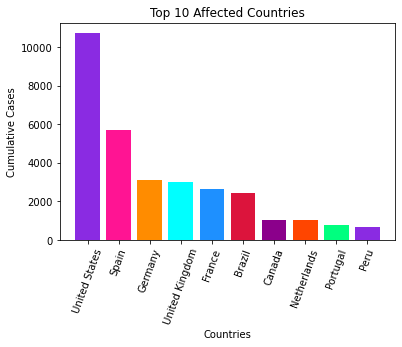

<Figure size 432x288 with 0 Axes>

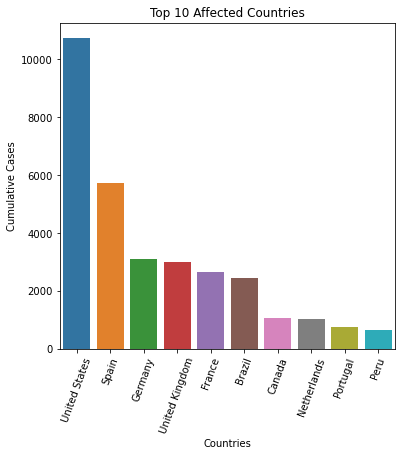

In [4]:
#Question 2
#Outputs the top ten affected countries by cumulative cases this year
casesSum = mpx_data.groupby('Country')['Cases'].sum().sort_values(ascending=False)
topTen = casesSum.head(10)
print(str('The top 10 countries by cumulative cases:\n\n'), topTen.to_string())

print(str('\nVisualization 2: \'Top 10 Affected Countries\' Bar Chart\n'))

topTenBar = plt.bar(topTen.index, topTen, color=['blueviolet', 'deeppink', 'darkorange', 'cyan', 'dodgerblue', 'crimson', 'darkmagenta', 'orangered', 'springgreen',])
plt.xlabel('Countries')
plt.ylabel('Cumulative Cases')
plt.title('Top 10 Affected Countries')
plt.xticks(rotation=70)
plt.figure()
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
seaborn.barplot(x=topTen.index, y=topTen)
ax.set(xlabel = 'Countries', ylabel = 'Cumulative Cases')
plt.title('Top 10 Affected Countries')
plt.xticks(rotation = 70)
plt.show()

The mean number of cases for all 90 countries observed is:  389.53
The index values for calculating the median are: 45, 46
The median for cumulative cases is 9.0, calculated as the mean of the values from India and Estonia

Visualization 3: 'Cumulative Cases' Relative Frequency Histogram



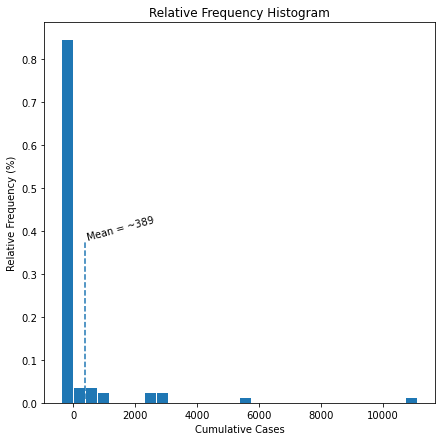

In [5]:
#Question 3a
#Displays the mean number of cumulative cases for all countries observed
cases = mpx_data.groupby('Country')['Cases'].sum()
casesMean = cases.mean()
print('The mean number of cases for all {} countries observed is: '.format(numCountries), round(casesMean, 2))

#Question 3b
#Outputs the median number of cumulative cases for all countries observed
#For an even number of countries, identifies median positions and averages their values
med1 = int((numCountries/2))
med2 = int((numCountries/2)+1)
calcMed = (casesSum[med1]+casesSum[med2])/2

if ((numCountries)%2) == 0:
    print('The index values for calculating the median are: '+str(med1)+', '+str(med2))
    print('The median for cumulative cases is '+str(calcMed)+', calculated as the mean of the values from '+str(casesSum.index[med1])+' and '+str(casesSum.index[med2]))
else:
    print('The index value of the median is: ', (numCountries+1)/2)
    print('The median country is '+str(casesSum.index[med1])+', with '+str(casesSum.iloc[int((numCountries+1)/2)])+' cumulative cases')
    
print(str('\nVisualization 3: \'Cumulative Cases\' Relative Frequency Histogram\n'))

res = stats.relfreq(cases, numbins = 30)
spaces = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)
fig, ax = plt.subplots(figsize=(7,7))
ax.bar(spaces, res.frequency, width=res.binsize)
ax.vlines(casesMean, 0.01, 0.38, linestyle='dashed')
ax.annotate('Mean = ~{}'.format(int(casesMean)), (casesMean, 0.38), rotation=15)
ax.set(xlabel='Cumulative Cases', ylabel='Relative Frequency (%)', title='Relative Frequency Histogram')
plt.show()

In [6]:
## Question 4
#Outputs cumulative number of confirmed cases globally
print('At present, the total number of confirmed cases for all countries worldwide is '+str(casesSum.sum()))

At present, the total number of confirmed cases for all countries worldwide is 35058


In [7]:
#Question 5a
#Prints countries ordered by earliest recorded case in 2022
earliest = mpx_data.groupby('Country')['Date'].min().sort_values().head(10)
#print('Earliest confirmed cases in 2022, by country: \n'+str(earliest))
print('Ten earliest confirmed countries in 2022: \n\n', earliest.to_string())

#Question 5b
#Returns earliest confirmed case in 2022, and the country it was recorded in
print('\nThe first recorded case of 2022 was in '+str(earliest.index[0])+str(' on ')+str(earliest[0]))

Ten earliest confirmed countries in 2022: 

 Country
Nigeria                             2022-01-31
Cameroon                            2022-02-17
Central African Republic            2022-03-04
Republic of Congo                   2022-04-12
United Kingdom                      2022-05-06
Democratic Republic Of The Congo    2022-05-08
Portugal                            2022-05-17
United States                       2022-05-18
Spain                               2022-05-18
France                              2022-05-19

The first recorded case of 2022 was in Nigeria on 2022-01-31
